In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import tensorflow as tf



def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    # Print training duration in a human-readable format
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    filepath = modelname+"trainingtime.txt"
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")



## runtime
def save_model_config_with_optimizer(model, modelname):
    filepath = modelname+"model_config.txt"
    with open(filepath, 'w') as f:
        # Save layer configurations
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        # Save optimizer configuration
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))


def save_model(model, modelname):
    model.save(modelname+".keras")

def save_performance_metrics(history, modelname):
    filepath = modelname+'performance_metrics.csv'
    pd.DataFrame(history.history).to_csv(filepath)
    
    
        
def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    """
    Plots the training and validation loss, and a performance metric from the training history, and saves the plots
    with the model name as a prefix. This version explicitly uses Figures and Axes for better control.

    Parameters:
    - history: Return value from model.fit().
    - metric_name: Name of the performance metric to plot (e.g., 'accuracy', 'mae').
    - model_name: Name of the model, used as a prefix for saving plot images.
    """

    # First plot: Training & validation loss values
    fig, ax = plt.subplots(figsize=(14, 6))  # Explicitly create a Figure and Axes
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)  # Adding grid explicitly
    loss_plot_filename = f'{model_name}_loss_plot.jpg'
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)  # Close the figure

    # Second plot: Training & validation performance metric
    fig, ax = plt.subplots(figsize=(14, 6))  # Again, explicitly create a Figure and Axes for the metric plot
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)  # Adding grid explicitly
    metric_plot_filename = f'{model_name}_{metric_name}_plot.jpg'
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)  # Close the figure to free up memory


def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name= modelname)
    

In [3]:
import os

def calculate_and_log_training_time(modelname, start_time, end_time):
    training_duration = end_time - start_time
    hours, rem = divmod(training_duration, 3600)
    minutes, seconds = divmod(rem, 60)
    
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, "trainingtime.txt")
    with open(filepath, "w") as f:
        f.write(f"Training took {int(hours):02d}:{int(minutes):02d}:{seconds:02f} (hh:mm:ss).")

def save_model_config_with_optimizer(model, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, "model_config.txt")
    with open(filepath, 'w') as f:
        for layer in model.layers:
            f.write(f"Layer: {layer.name}\n")
            f.write(f"Config: {layer.get_config()}\n\n")
        
        optimizer_config = model.optimizer.get_config()
        f.write("Optimizer Config:\n")
        f.write(str(optimizer_config))

def save_model(model, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    model_path = os.path.join(model_dir, modelname + ".keras")
    model.save(model_path)

def save_performance_metrics(history, modelname):
    model_dir = modelname
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    filepath = os.path.join(model_dir, 'performance_metrics.csv')
    pd.DataFrame(history.history).to_csv(filepath)

def plot_loss_and_metric(history, metric_name='accuracy', model_name='model'):
    model_dir = model_name
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # First plot: Training & validation loss
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(history.history['loss'], label='Train Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title('Model Loss')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    ax.grid(True)
    loss_plot_filename = os.path.join(model_dir, f'{model_name}_loss_plot.jpg')
    fig.savefig(loss_plot_filename)
    print(f"Loss plot saved as: {loss_plot_filename}")
    plt.close(fig)
    
    # Second plot: Training & validation metric
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(history.history[metric_name], label=f'Train {metric_name.capitalize()}')
    ax.plot(history.history[f'val_{metric_name}'], label=f'Validation {metric_name.capitalize()}')
    ax.set_title(f'Model {metric_name.capitalize()}')
    ax.set_ylabel(metric_name.capitalize())
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')
    ax.grid(True)
    metric_plot_filename = os.path.join(model_dir, f'{model_name}_{metric_name}_plot.jpg')
    fig.savefig(metric_plot_filename)
    print(f"Metric plot saved as: {metric_plot_filename}")
    plt.close(fig)

def save_model_and_config_and_metrics(model, history, modelname = "model"):
    save_model_config_with_optimizer(model, modelname = modelname)
    save_model(model, modelname = modelname)
    save_performance_metrics(history, modelname = modelname)
    plot_loss_and_metric(history, metric_name='mae', model_name= modelname)

## Greyscale

In [4]:
path = r"C:\Users\busjo\Documents\JADS\Semester 2\Deep Learning\Project\Part1_Processed_Grey.pkl"
# Open the pickle file in binary mode
with open(path, 'rb') as file:
    # Load the content of the file into a variable
    grey_data = pickle.load(file)

In [5]:
sampled_grey_data = grey_data.sample(n=1500)
#sampled_grey_data = grey_data

X = np.stack(sampled_grey_data['Image'].values)  # Converts a column of arrays into a single numpy array
X = X.reshape(X.shape[0], 256, 256, 1)
y = sampled_grey_data['Age'].values
#X = list(sampled_grey_data['Image'].values)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='linear')  
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

start_time = time.time()
history = model1.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
end_time = time.time()

modelname = 'cnn_grey_1'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model1, history = history,  modelname = modelname)

c:\Users\busjo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [14]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='linear')  
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

start_time = time.time()
history = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
end_time = time.time()

modelname = 'cnn_grey_2_dropout'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model2, history = history,  modelname = modelname)

c:\Users\busjo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 935ms/step - loss: 1634.1606 - mae: 30.7707 - val_loss: 883.7107 - val_mae: 22.2792
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 926ms/step - loss: 825.7773 - mae: 23.5434 - val_loss: 783.1424 - val_mae: 21.3620
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 929ms/step - loss: 726.5474 - mae: 22.3873 - val_loss: 746.2041 - val_mae: 20.9406
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 975ms/step - loss: 669.0268 - mae: 21.5673 - val_loss: 774.5165 - val_mae: 21.0245
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 937ms/step - loss: 695.4950 - mae: 21.8337 - val_loss: 761.0788 - val_mae: 20.8424
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 29s 964ms/step - loss: 709.5378 - mae: 22.1661 - val_loss: 692.1946 - val_mae: 20.2734
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 664.1293 - mae: 21.4943 - val_loss: 703.6348 - val_mae: 20.2127
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - loss: 615.4731 - mae: 20.0641 - val_loss: 693.1008 - val_mae: 19.5775
Epoch

In [8]:
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='linear')
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

start_time = time.time()
history = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
end_time = time.time()

modelname = 'cnn_grey_3_regularization'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model3, history = history,  modelname = modelname)

test_loss, test_mae = model3.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

c:\Users\busjo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 180s 872ms/step - loss: 703.0782 - mae: 21.7366 - val_loss: 419.4353 - val_mae: 16.2762
Epoch 2/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 177s 870ms/step - loss: 431.1678 - mae: 15.9729 - val_loss: 367.3565 - val_mae: 14.1911
Epoch 3/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 174s 859ms/step - loss: 346.8914 - mae: 14.0485 - val_loss: 334.7912 - val_mae: 13.2829
Epoch 4/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 174s 856ms/step - loss: 302.6547 - mae: 12.9110 - val_loss: 358.9816 - val_mae: 13.3778
Epoch 5/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 176s 866ms/step - loss: 253.7895 - mae: 11.8345 - val_loss: 303.8709 - val_mae: 12.9943
Epoch 6/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 173s 852ms/step - loss: 203.6882 - mae: 10.6897 - val_loss: 331.6947 - val_mae: 13.5374
Epoch 7/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 173s 852ms/step - loss: 152.5187 - mae: 9.0772 - val_loss: 301.8691 - val_mae: 12.3429
Epoch 8/20
203/203 ━━━━━━━━━━━━━━━━━━━━ 173s 851ms/step - loss: 128.4375 - mae: 8.2097 - val_loss: 275.78

In [6]:
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.50),
    Dense(1, activation='linear')
])

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

start_time = time.time()
history = model4.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.2)
end_time = time.time()

modelname = 'cnn_grey_4_regularization_dropout'
calculate_and_log_training_time(modelname = modelname, start_time = start_time, end_time = end_time)
save_model_and_config_and_metrics(model = model4, history = history,  modelname = modelname)

test_loss, test_mae = model4.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

c:\Users\busjo\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 680ms/step - loss: 1013.4998 - mae: 25.3227 - val_loss: 1001.5715 - val_mae: 23.1213
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 684ms/step - loss: 802.5677 - mae: 23.4325 - val_loss: 907.3276 - val_mae: 22.2427
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 672ms/step - loss: 658.5303 - mae: 21.1299 - val_loss: 658.4299 - val_mae: 20.5741
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 672ms/step - loss: 655.4486 - mae: 21.7516 - val_loss: 662.7924 - val_mae: 22.1545
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 675ms/step - loss: 674.6443 - mae: 21.7208 - val_loss: 567.0229 - val_mae: 18.4125
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 674ms/step - loss: 587.7359 - mae: 19.5968 - val_loss: 472.2002 - val_mae: 17.1843
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 676ms/step - loss: 498.4842 - mae: 17.8074 - val_loss: 499.5736 - val_mae: 18.5276
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - loss: 460.9418 - mae: 16.5977 - val_loss: 376.0168 - val_mae: 15.566

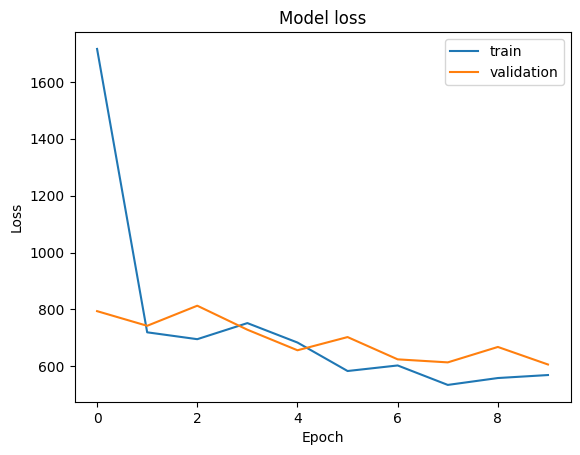

In [69]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [70]:
model.save('ANN_grayscale1.h5')